In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [90]:
import pandas as pd
import seaborn as sns

# Supervised Learning Part 2 -- Regression Analysis

In regression we are trying to predict a continuous output variable -- in contrast to the nominal variables we were predicting in the previous classification examples. 

Let's start with a simple toy example with one feature dimension (explanatory variable) and one target variable. We will create a dataset out of a sine curve with some noise:

In [3]:
x = np.linspace(-3, 3, 100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [4]:
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

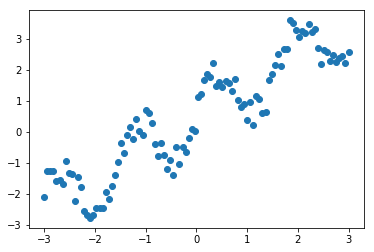

In [5]:
plt.plot(x, y, 'o');

Linear Regression
=================

The first model that we will introduce is the so-called simple linear regression. Here, we want to fit a line to the data, which 

One of the simplest models again is a linear one, that simply tries to predict the data as lying on a line. One way to find such a line is `LinearRegression` (also known as [*Ordinary Least Squares (OLS)*](https://en.wikipedia.org/wiki/Ordinary_least_squares) regression).
The interface for LinearRegression is exactly the same as for the classifiers before, only that ``y`` now contains float values, instead of classes.

As we remember, the scikit-learn API requires us to provide the target variable (`y`) as a 1-dimensional array; scikit-learn's API expects the samples (`X`) in form a 2-dimensional array -- even though it may only consist of 1 feature. Thus, let us convert the 1-dimensional `x` NumPy array into an `X` array with 2 axes:


In [6]:
print('Before: ', x.shape)
X = x[:, np.newaxis]
print('After: ', X.shape)

Before:  (100,)
After:  (100, 1)


Again, we start by splitting our dataset into a training (75%) and a test set (25%):

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Next, we use the learning algorithm implemented in `LinearRegression` to **fit a regression model to the training data**:

In [8]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

After fitting to the training data, we paramerterized a linear regression model with the following values.

In [9]:
print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

Weight coefficients:  [0.90211711]
y-axis intercept:  0.44840974988268


Since our regression model is a linear one, the relationship between the target variable (y) and the feature variable (x) is defined as 

$$y = \text{weight} \times x + \text{intercept .}$$

Plugging in the min and max values into thos equation, we can plot the regression fit to our training data:

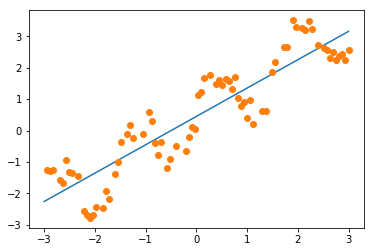

In [11]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o');

Similar to the estimators for classification in the previous notebook, we use the `predict` method to predict the target variable. And we expect these predicted values to fall onto the line that we plotted previously:

In [12]:
y_pred_train = regressor.predict(X_train)

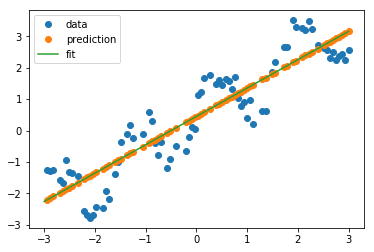

In [13]:
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best')

As we can see in the plot above, the line is able to capture the general slope of the data, but not many details.

Next, let's try the test set:

In [14]:
y_pred_test = regressor.predict(X_test)

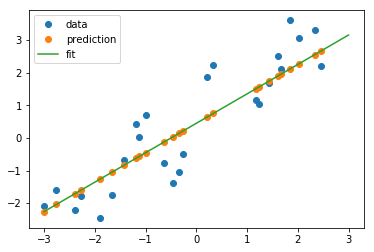

In [15]:
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best');

Again, scikit-learn provides an easy way to evaluate the prediction quantitatively using the ``score`` method. For regression tasks, this is the R<sup>2</sup> score. Another popular way would be the Mean Squared Error (MSE). As its name implies, the MSE is simply the average squared difference over the predicted and actual target values

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (\text{predicted}_i - \text{true}_i)^2$$

In [16]:
regressor.score(X_test, y_test)

0.7994321405079685

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Add a (non-linear) feature containing  `sin(4x)` to `X` and redo the fit as a new column to X_train (and X_test). Visualize the predictions with this new richer, yet linear, model.
      </li>
      <li>
      Hint: you can use `np.concatenate(A, B, axis=1)` to concatenate two matrices A and B horizontal (to combine the columns).
      </li>
    </ul>
</div>

In [69]:
X_new = np.c_[X[:,0], np.sin(4*X[:,0])]

In [45]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y, test_size= 0.25, random_state = 42)

In [46]:
linear_model = LinearRegression()

In [47]:
linear_model.fit(X_new_train, y_new_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
y_new_train_pred = linear_model.predict(X_new_train)

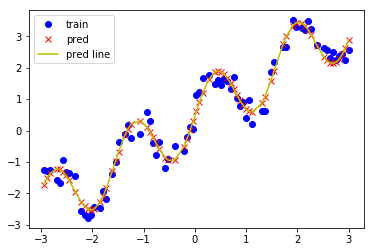

In [61]:
plt.plot(X_new_train[:,0], y_new_train, 'bo', label = 'train')
plt.plot(X_new_train[:,0], y_new_train_pred, 'rx', label = 'pred')
#plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.plot(np.unique(X_new_train[:,0]), np.poly1d(
    np.polyfit(X_new_train[:,0], y_new_train_pred, 20))(np.unique(X_new_train[:,0])),
        'y-', label = 'pred line')
plt.legend(loc='best')
plt.show()

In [43]:
linear_model.score(X_new_train, y_test)

0.8189190775347295

In [44]:
linear_model.score(X_new_test, y_new_test)

0.7994321405079685

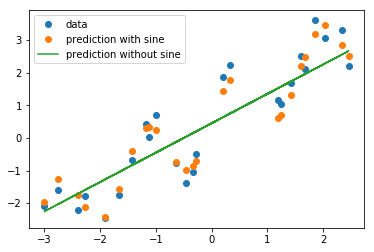

In [77]:
# %load solutions/06B_lin_with_sine.py
XX_train = np.concatenate((X_train, np.sin(4 * X_train)), axis=1)
XX_test = np.concatenate((X_test, np.sin(4 * X_test)), axis=1)
regressor.fit(XX_train, y_train)
y_pred_test_sine = regressor.predict(XX_test)

plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test_sine, 'o', label="prediction with sine")
plt.plot(X_test, y_pred_test, label='prediction without sine')
plt.legend(loc='best');


KNeighborsRegression
=======================
As for classification, we can also use a neighbor based method for regression. We can simply take the output of the nearest point, or we could average several nearest points. This method is less popular for regression than for classification, but still a good baseline.

In [78]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform')

Again, let us look at the behavior on training and test set:

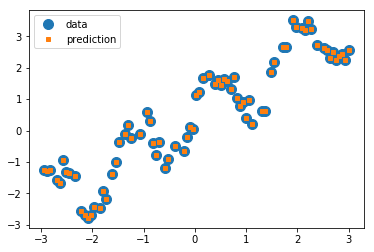

In [79]:
y_pred_train = kneighbor_regression.predict(X_train)

plt.plot(X_train, y_train, 'o', label="data", markersize=10)
plt.plot(X_train, y_pred_train, 's', label="prediction", markersize=4)
plt.legend(loc='best');

On the training set, we do a perfect job: each point is its own nearest neighbor!

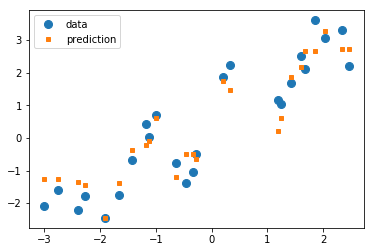

In [80]:
y_pred_test = kneighbor_regression.predict(X_test)

plt.plot(X_test, y_test, 'o', label="data", markersize=8)
plt.plot(X_test, y_pred_test, 's', label="prediction", markersize=4)
plt.legend(loc='best');

On the test set, we also do a better job of capturing the variation, but our estimates look much messier than before.
Let us look at the R<sup>2</sup> score:

In [81]:
kneighbor_regression.score(X_test, y_test)

0.9166293022467948

Much better than before! Here, the linear model was not a good fit for our problem; it was lacking in complexity and thus under-fit our data.

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Compare the KNeighborsRegressor and LinearRegression on the boston housing dataset. You can load the dataset using ``sklearn.datasets.load_boston``. You can learn about the dataset by reading the ``DESCR`` attribute.
      </li>
    </ul>
</div>

In [82]:
from sklearn.datasets import load_boston

In [83]:
boston_data = load_boston()

In [85]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [94]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [89]:
boston_data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [95]:
boston_df = pd.DataFrame(data = boston_data['data'], columns=boston_data['feature_names'])
boston_df['price'] = boston_data['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [96]:
sns.pairplot?

Signature:
sns.pairplot(
    data,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    dropna=True,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each
variable in ``data`` will by shared in the y-axis across a single row and
in the x-axis across a single column. The diagonal Axes are treated
differently, drawing a plot to show the univariate distribution of the data
for the variable in that column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you need more flexibility.

Parameters
------

In [101]:
sns.PairGrid?

Init signature:
sns.PairGrid(
    data,
    hue=None,
    hue_order=None,
    palette=None,
    hue_kws=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    diag_sharey=True,
    height=2.5,
    aspect=1,
    despine=True,
    dropna=True,
    size=None,
)
Docstring:     
Subplot grid for plotting pairwise relationships in a dataset.

This class maps each variable in a dataset onto a column and row in a
grid of multiple axes. Different axes-level plotting functions can be
used to draw bivariate plots in the upper and lower triangles, and the
the marginal distribution of each variable can be shown on the diagonal.

It can also represent an additional level of conditionalization with the
``hue`` parameter, which plots different subets of data in different
colors. This uses color to resolve elements on a third dimension, but
only draws subsets on top of each other and will not tailor the ``hue``
parameter for the specific visualization the way that axes-level functions
that accept `

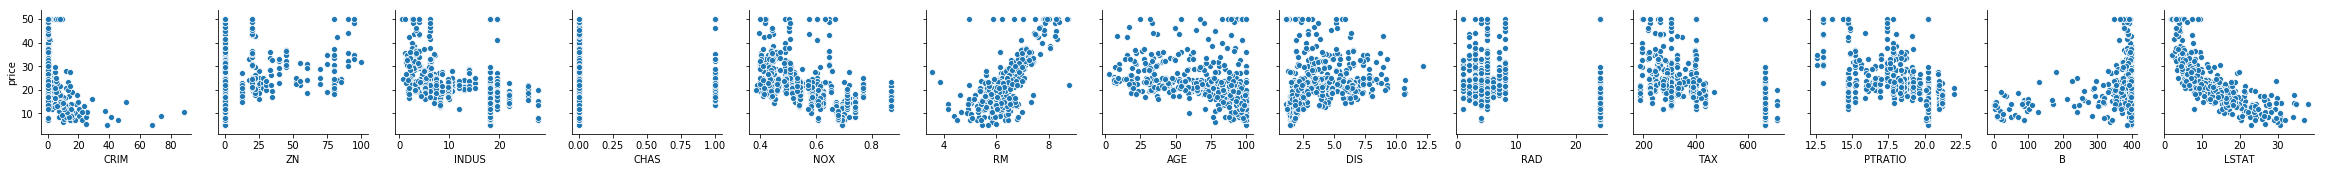

In [100]:
pg = sns.pairplot(boston_df, x_vars = boston_data['feature_names'], y_vars='price')

In [104]:
sns.regplot?

Signature:
sns.regplot(
    x,
    y,
    data=None,
    x_estimator=None,
    x_bins=None,
    x_ci='ci',
    scatter=True,
    fit_reg=True,
    ci=95,
    n_boot=1000,
    units=None,
    order=1,
    logistic=False,
    lowess=False,
    robust=False,
    logx=False,
    x_partial=None,
    y_partial=None,
    truncate=False,
    dropna=True,
    x_jitter=None,
    y_jitter=None,
    label=None,
    color=None,
    marker='o',
    scatter_kws=None,
    line_kws=None,
    ax=None,
)
Docstring:
Plot data and a linear regression model fit.

There are a number of mutually exclusive options for estimating the
regression model. See the :ref:`tutorial <regression_tutorial>` for more
information.    

Parameters
----------
x, y: string, series, or vector array
    Input variables. If strings, these should correspond with column names
    in ``data``. When pandas objects are used, axes will be labeled with
    the series name.
data : DataFrame
    Tidy ("long-form") dataframe where each col

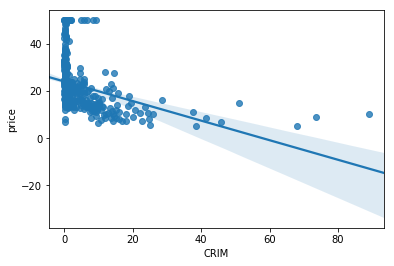

In [117]:
pg = sns.regplot(x = 'CRIM', y= 'price', data = boston_df)

In [169]:
from scipy.stats.stats import pearsonr

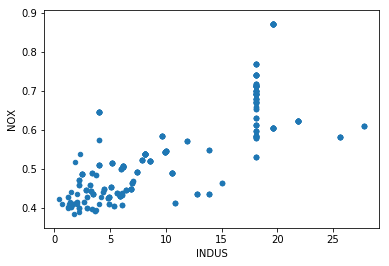

In [178]:
boston_df.plot.scatter('INDUS', 'NOX')

C:\Users\Maddy\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


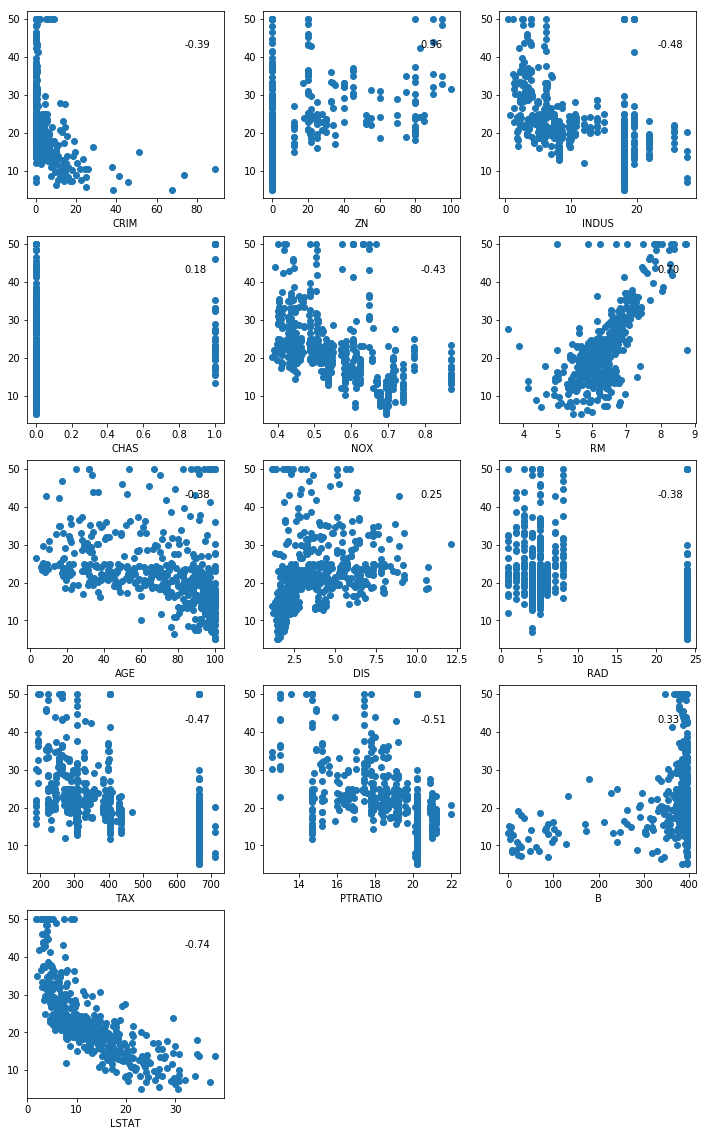

In [176]:
columns = 3
rows = int(len(boston_data['feature_names'])/columns) + 1
total = columns*rows
fig = plt.figure(figsize=(columns*4,rows*4))
for i in range(1,len(boston_data['feature_names'])+1):
    ax = fig.add_subplot(rows,columns,i)
    x_name = boston_data['feature_names'][i-1]
    ax.plot(x_name, 'price', 'o', data = boston_df)
    ax.set_xlabel(x_name)
    ax.text(0.8,0.8,'{:.2f}'.format(pearsonr(boston_df.price, boston_df[x_name])[0]), transform=ax.transAxes)
fig.show()

In [145]:
train_X, test_X, train_y, test_y = train_test_split(
    boston_df.iloc[:,0:-1], boston_df.iloc[:,-1], test_size=0.25, random_state=42)

In [148]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [152]:
train_X.shape

(379, 13)

In [153]:
perf_df = pd.DataFrame()
for k in [1,2,4,5,7,8,10,14,18,25,31]:
    
    knn_boston = KNeighborsRegressor(n_neighbors=k).fit(train_X, train_y)
    pred_y_train= knn_boston.predict(train_X)
    pred_y_test= knn_boston.predict(test_X)
    
    len_train =len(train_X)
    len_test =len(test_X)
    r2_train = r2_score(train_y, pred_y_train)
    r2_adj_train =1- (1-r2_train)*(len_train-1)/(len_train-train_X.shape[1]-1)
    r2_test = r2_score(test_y, pred_y_test)
    r2_adj_test =1- (1-r2_test)*(len_test-1)/(len_test-test_X.shape[1]-1)
    
    temp_df = pd.DataFrame({
        'k':[k],
        'train_r2' : [r2_train],
        'train_r2_adjusted' : [r2_adj_train],
        'train_mae' : [mean_absolute_error(train_y, pred_y_train)],
        'train_rmse' : [np.sqrt(mean_squared_error(train_y, pred_y_train))],
        'test_r2' : [r2_test],
        'test_r2_adjusted' : [r2_adj_test],
        'test_mae' : [mean_absolute_error(test_y, pred_y_test)],
        'test_rmse' : [np.sqrt(mean_squared_error(test_y, pred_y_test))],
    })
    perf_df = perf_df.append(temp_df)

print(perf_df)

    k  train_r2  train_r2_adjusted  train_mae  train_rmse   test_r2  \
0   1  1.000000           1.000000   0.000000    0.000000  0.481494   
0   2  0.839521           0.833806   2.520844    3.772470  0.554433   
0   4  0.698743           0.688013   3.590172    5.168753  0.653372   
0   5  0.667909           0.656081   3.753931    5.426823  0.639665   
0   7  0.621565           0.608086   4.089823    5.793123  0.570995   
0   8  0.607098           0.593104   4.160356    5.902817  0.553388   
0  10  0.577389           0.562337   4.266016    6.121921  0.512975   
0  14  0.518600           0.501454   4.612269    6.533863  0.504996   
0  18  0.449381           0.429770   4.984609    6.987837  0.469459   
0  25  0.380355           0.358285   5.317098    7.412908  0.410761   
0  31  0.327996           0.304061   5.561341    7.719747  0.353013   

   test_r2_adjusted  test_mae  test_rmse  
0          0.421842  3.681102   6.025739  
0          0.503174  3.902756   5.585853  
0          0.61349

In [156]:
perf_df.columns[1:]

Index(['train_r2', 'train_r2_adjusted', 'train_mae', 'train_rmse', 'test_r2',
       'test_r2_adjusted', 'test_mae', 'test_rmse'],
      dtype='object')

In [164]:
perf_df.plot?

Signature:     
perf_df.plot(
    x=None,
    y=None,
    kind='line',
    ax=None,
    subplots=False,
    sharex=None,
    sharey=False,
    layout=None,
    figsize=None,
    use_index=True,
    title=None,
    grid=None,
    legend=True,
    style=None,
    logx=False,
    logy=False,
    loglog=False,
    xticks=None,
    yticks=None,
    xlim=None,
    ylim=None,
    rot=None,
    fontsize=None,
    colormap=None,
    table=False,
    yerr=None,
    xerr=None,
    secondary_y=False,
    sort_columns=False,
    **kwds,
)
Type:           FramePlotMethods
String form:    <pandas.plotting._core.FramePlotMethods object at 0x00000236D5E1B390>
File:           c:\users\maddy\anaconda3\lib\site-packages\pandas\plotting\_core.py
Docstring:     
DataFrame plotting accessor and method

Examples
--------
>>> df.plot.line()
>>> df.plot.scatter('x', 'y')
>>> df.plot.hexbin()

These plotting methods can also be accessed by calling the accessor as a
method with the ``kind`` argument:
``df.plot(ki

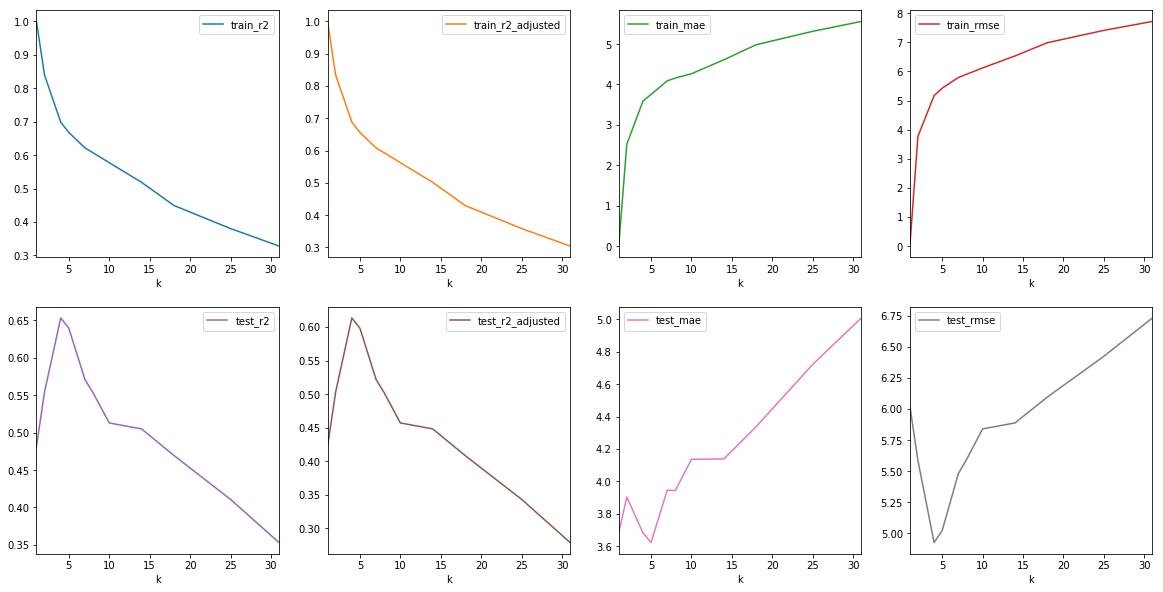

In [166]:
perf_df.plot(x=perf_df.columns[0], y = perf_df.columns[1:], 
             kind = 'line',subplots =True, figsize = (20,10),
             layout = (2,4), sharex = False, sharey=False)
plt.show()

In [187]:
knn_boston = KNeighborsRegressor(n_neighbors=4).fit(train_X, train_y)
pred_y_train= knn_boston.predict(train_X)
pred_y_test= knn_boston.predict(test_X)

In [188]:
len_train =len(train_X)
len_test =len(test_X)
r2_train = r2_score(train_y, pred_y_train)
r2_adj_train =1- (1-r2_train)*(len_train-1)/(len_train-train_X.shape[1]-1)
mae_train = mean_absolute_error(train_y, pred_y_train)
rmse_train = np.sqrt(mean_squared_error(train_y, pred_y_train))
print('Train : R2 {:.02f} , R2 adjusted {:.02f}, RMSE {:.02f}, MAE {:.02f}'.format(
    r2_train, r2_adj_train, mae_train, rmse_train))

r2_test = r2_score(test_y, pred_y_test)
r2_adj_test =1- (1-r2_test)*(len_test-1)/(len_test-test_X.shape[1]-1)
mae_test = mean_absolute_error(test_y, pred_y_test)
rmse_test = np.sqrt(mean_squared_error(test_y, pred_y_test))
print('Test : R2 {:.02f} , R2 adjusted {:.02f}, RMSE {:.02f}, MAE {:.02f}'.format(
    r2_test, r2_adj_test, mae_test, rmse_test))

Train : R2 0.70 , R2 adjusted 0.69, RMSE 3.59, MAE 5.17
Test : R2 0.65 , R2 adjusted 0.61, RMSE 3.68, MAE 4.93


In [189]:
from sklearn.linear_model import LinearRegression

In [190]:
linear_boston = LinearRegression()

In [191]:
linear_boston.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [192]:
pred_y_train= linear_boston.predict(train_X)
pred_y_test= linear_boston.predict(test_X)

In [193]:
len_train =len(train_X)
len_test =len(test_X)
r2_train = r2_score(train_y, pred_y_train)
r2_adj_train =1- (1-r2_train)*(len_train-1)/(len_train-train_X.shape[1]-1)
mae_train = mean_absolute_error(train_y, pred_y_train)
rmse_train = np.sqrt(mean_squared_error(train_y, pred_y_train))
print('Train : R2 {:.02f} , R2 adjusted {:.02f}, RMSE {:.02f}, MAE {:.02f}'.format(
    r2_train, r2_adj_train, mae_train, rmse_train))

r2_test = r2_score(test_y, pred_y_test)
r2_adj_test =1- (1-r2_test)*(len_test-1)/(len_test-test_X.shape[1]-1)
mae_test = mean_absolute_error(test_y, pred_y_test)
rmse_test = np.sqrt(mean_squared_error(test_y, pred_y_test))
print('Test : R2 {:.02f} , R2 adjusted {:.02f}, RMSE {:.02f}, MAE {:.02f}'.format(
    r2_test, r2_adj_test, mae_test, rmse_test))

Train : R2 0.75 , R2 adjusted 0.74, RMSE 3.37, MAE 4.73
Test : R2 0.68 , R2 adjusted 0.65, RMSE 3.06, MAE 4.70


In [195]:
# %load solutions/06A_knn_vs_linreg.py
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


boston = load_boston()
X = boston.data
y = boston.target

print('X.shape:', X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

linreg = LinearRegression()
knnreg = KNeighborsRegressor(n_neighbors=1)

linreg.fit(X_train, y_train)
print('Linear Regression Train/Test: %.3f/%.3f' %
      (linreg.score(X_train, y_train),
       linreg.score(X_test, y_test)))

knnreg.fit(X_train, y_train)
print('KNeighborsRegressor Train/Test: %.3f/%.3f' %
      (knnreg.score(X_train, y_train),
       knnreg.score(X_test, y_test)))


X.shape: (506, 13)
Linear Regression Train/Test: 0.748/0.684
KNeighborsRegressor Train/Test: 1.000/0.481
